# About

For my first ever Makeover Monday participation, I decided to take it easy and focus on getting the basics right. I tried to recreate the original chart first. I then focussed on making it slightly better by adding a general trendline and a more descriptive chart title to highlight the main story. 

The original chart can be found [here](https://data.world/makeovermonday/2021w12).

# Setup

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
## load data
df = pd.read_excel("Personal Consumption Expenditures.xlsx")

# Overview

In [11]:
print(df.shape)
print(df.columns)
print("")
df.head()

(14900, 4)
Index(['Category', 'Sub-Category', 'Month', 'Millions of Dollars'], dtype='object')



,Category,Sub-Category,Month,Millions of Dollars
0,Alcoholic beverages,Beer,1976-01-01,9908
1,Alcoholic beverages,Beer,1976-02-01,9994
2,Alcoholic beverages,Beer,1976-03-01,10127
3,Alcoholic beverages,Beer,1976-04-01,10204
4,Alcoholic beverages,Beer,1976-05-01,10233


# Explore

In [22]:
# categories
print("Number of categories: ",len(df[df.columns[0]].unique()))
df[df.columns[0]].value_counts()

Number of categories:  11


Meats and poultry                                    2980
Alcoholic beverages                                  2235
Milk, dairy products, and eggs                       2235
Fresh fruits and vegetables                          1490
Cereals and bakery products                          1490
Coffee, tea, and other beverage materials             745
Sugar and sweets                                      745
Mineral waters, soft drinks, and vegetable juices     745
Fish and seafood                                      745
Fats and oils                                         745
Processed fruits and vegetables                       745
Name: Category, dtype: int64

In [19]:
df[df.columns[1]].value_counts()

Coffee, tea, and other beverage materials            745
Sugar and sweets                                     745
Fruit (fresh)                                        745
Processed fruits and vegetables                      745
Spirits                                              745
Fats and oils                                        745
Beer                                                 745
Processed dairy products                             745
Pork                                                 745
Fresh milk                                           745
Wine                                                 745
Cereals                                              745
Vegetables (fresh)                                   745
Beef and veal                                        745
Poultry                                              745
Eggs                                                 745
Fish and seafood                                     745
Other meats                    

In [32]:
df2 = pd.DataFrame(df.groupby(["Category", "Month"])["Millions of Dollars"].sum())
df2.reset_index()

,Category,Month,Millions of Dollars
0,Alcoholic beverages,1959-01-01,6344
1,Alcoholic beverages,1959-02-01,6285
2,Alcoholic beverages,1959-03-01,6264
3,Alcoholic beverages,1959-04-01,6112
4,Alcoholic beverages,1959-05-01,6327
...,...,...,...
8190,Sugar and sweets,2020-09-01,52085
8191,Sugar and sweets,2020-10-01,51775
8192,Sugar and sweets,2020-11-01,52330
8193,Sugar and sweets,2020-12-01,51848


# Recreate original chart

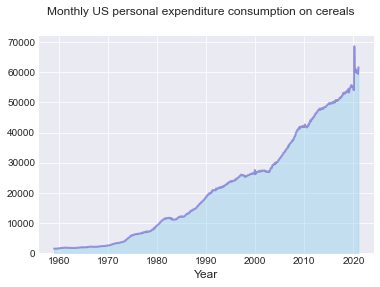

In [55]:
# group dollars by sub-category
df_grouped = pd.DataFrame(df.groupby(["Sub-Category", "Month"])["Millions of Dollars"].sum()).reset_index()

# set y and x axis values
cereals = df_grouped.loc[df_grouped["Sub-Category"]== "Cereals"]["Millions of Dollars"]
time = df_grouped.loc[df_grouped["Sub-Category"]== "Cereals"]["Month"]

# plot area and line
plt.fill_between(time, cereals, color="skyblue", alpha=0.4)
plt.plot(time, cereals, color="Slateblue", alpha=0.6, linewidth=2)

# add labels
plt.xlabel('Year', size=12)
plt.suptitle('Monthly US personal expenditure consumption on cereals', size=12)
plt.ylim(bottom=0)

plt.show()

## Improve chart 

By adding a trendline for total spending on a secondary axis and having a more descriptive title. 

<ipython-input-368-6c2c644725d5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels)


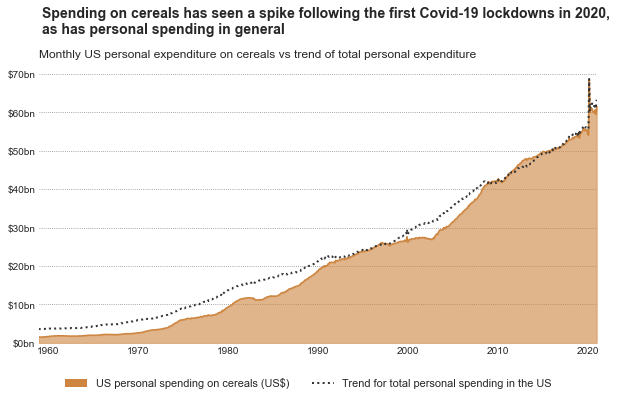

In [368]:
# =========================
# Get data

# group dollars by sub-category
df_grouped = pd.DataFrame(df.groupby(["Sub-Category", "Month"])["Millions of Dollars"].sum()).reset_index()

# set values
cereals = df_grouped.loc[df_grouped["Sub-Category"]== "Cereals"]["Millions of Dollars"]
totals = df_grouped.groupby("Month")["Millions of Dollars"].sum()
time = df_grouped.loc[df_grouped["Sub-Category"]== "Cereals"]["Month"]

# =========================
#2) Create chart

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,5))

# change background colour to white
ax.set_facecolor("white")

# =======
# Plot cereals

# add line
ax.plot(time, cereals, color="peru", label="cereals")

# add area 
plt.fill_between(time, cereals, color="peru", alpha=0.6)

#Set and format y-axis labels
ax.set_ylim([0,cereals.max() *1.03])
new_labels = []
for label in [label/1000 for label in ax.get_yticks().tolist()]:
    txt = "${value:.0f}bn"
    new = txt.format(value = label)
    new_labels.append(new)
new_labels
ax.set_yticklabels(new_labels)

# set gridlines for y-axis
ax.grid(b=True, which='major', color='grey', linestyle=':', axis='y')

# x-axis
ax.set_xlim([time.min(), time.max()])

# =======
# Plot Totals

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(time, totals,color="#333333", linestyle='dotted', linewidth=2)

# Hide secondary grid and y-axis ticks
ax2.grid(False)
ax2.set_yticks([])

# set y-axis values
ax2.set_ylim([0,totals.max()*1.03])


# =========================
# Format chart layout

# =======
# Add title and subtitle
plt.suptitle("Spending on cereals has seen a spike following the first Covid-19 lockdowns in 2020,\nas has personal spending in general", 
             size=14, y=1.06, ha='left', x=0.13, fontweight='bold')
plt.title("Monthly US personal expenditure on cereals vs trend of total personal expenditure", 
          size=12, y=1.03, ha='left', x=0)

# =======
# Create legend
# labels
labels = ['US personal spending on cereals (US$)', 'Trend for total personal spending in the US']

# import libraries to create artists
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# create legend artists
black_line = mlines.Line2D([], [], color="#333333", linestyle='dotted', linewidth=2)
patch = mpatches.Patch(facecolor='peru', edgecolor=None)

# set legend
fig.legend(handlegit gits = [patch, black_line],labels=labels, fontsize =11,
       loc="lower center", ncol=2, borderaxespad=0.1)

# =========================
# Display

plt.show()

## Export to work in d3

If I got time, I will try and recreate the chart in d3.

In [263]:
# group by subcategory and calculate totals column
df_grouped = pd.DataFrame(df.groupby(["Sub-Category", "Month"])["Millions of Dollars"].sum())
df_grouped = df_grouped.unstack().transpose().reset_index().drop(columns="level_0").set_index("Month")
df_grouped["Total"] = df_grouped.sum(axis=1)

#export to csv
df_grouped[["Cereals", "Total"]].to_csv("cereals-data-for-d3.csv")

## Stacked bar chart + "stream graph"

Experimenting with a stream graph. Unfortunately, matplotlib doesn't really have this chart type. Changing the baseline criteria is a workaround. 

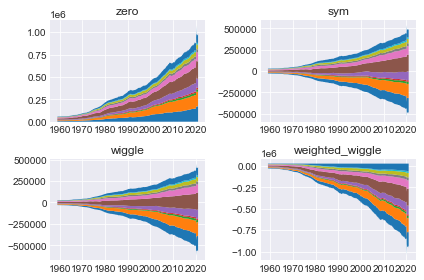

In [97]:
# group dollars by sub-category
df_grouped = pd.DataFrame(df.groupby(["Category", "Month"])["Millions of Dollars"].sum()).reset_index()
df_grouped.groupby("Category")["Month"].count()

# set values
y1 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[0]]["Millions of Dollars"]
y2 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[1]]["Millions of Dollars"]
y3 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[2]]["Millions of Dollars"]
y4 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[3]]["Millions of Dollars"]
y5 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[4]]["Millions of Dollars"]
y6 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[5]]["Millions of Dollars"]
y7 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[6]]["Millions of Dollars"]
y8 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[7]]["Millions of Dollars"]
y9 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[8]]["Millions of Dollars"]
y10 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[9]]["Millions of Dollars"]
y11 = df_grouped.loc[df_grouped["Category"]==df["Category"].unique()[10]]["Millions of Dollars"]
time = df_grouped["Month"].unique()

# There are 4 types of baseline we can use:
baseline = ["zero", "sym", "wiggle", "weighted_wiggle"]

# Let's make 4 plots, 1 for each baseline
for n, v in enumerate(baseline):
    if n<3 :
        plt.tick_params(labelbottom='off')
    plt.subplot(2 ,2, n + 1)
    plt.stackplot(time, y1, y2, y3, y4, y5,y6, y7, y8, y9, y10, y11, baseline=v)
    plt.title(v)
    plt.tight_layout()

# create plot
#plt.stackplot(time, y1, y2, y3, y4, y5,y6, y7, y8, y9, y10, y11, baseline='wiggle')

## Small multiples

The next idea would be to create small multiple line charts for each category to see if there is any standing out with a slightly different trendlines. But first, we'd want to normalise data first so that we can compare trendlines with each other. 

TODO

### normalise data for categories

In [23]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("Consumption by category", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

KeyError: "['x'] not found in axis"